In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import plotly.plotly as py
import plotly.dashboard_objs as dashboard
import plotly.figure_factory as ff
import IPython.display
from IPython.display import Image
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix

In [2]:
# Reading data from Ticket_Report
data = pd.read_csv('C:\Program Files\Python36\Tickets_Report.csv',encoding="ISO-8859-1",engine = "python")

dataframe_y = pd.DataFrame(data['Affected CI'].values)
dataframe_x = pd.DataFrame(data['Short description'].values)

data["Short description"] = data['Short description'].apply(lambda x : str(x))
data["Short description"] = data['Short description'].apply(lambda x : ' '.join(re.sub(r"([!@#$]+)|([^A-Za-z .*\t])|(\w+:\/\/\S+)",' ',x).split()))

data["Affected CI"] = data['Affected CI'].apply(lambda x : str(x))
data["Affected CI"] = data['Affected CI'].apply(lambda x : ' '.join(re.sub(r"([!@#$]+)|([^A-Za-z .*\t])|(\w+:\/\/\S+)",' ',x).split()))

data["Description"] = data.Description.apply(lambda x : str(x))
data["Description"] = data.Description.apply(lambda x : ' '.join(re.sub(r"([!@#$]+)|([^A-Za-z .*\t])|(\w+:\/\/\S+)",' ',x).split()))


In [3]:
data.head()

,Number,Assignment group,Assignment To,State,Priority,Short description,Task type,Affected CI,Business Service,Closed,...,Opened,Unnamed: 15,Parent,Updated,Updated By,Acknowledged on [Service Order Task],Made SLA,Work Resoultion Notes,Unnamed: 22,Unnamed: 23
0,CTASK0000982,Application Admin,NaN,Closed Complete,4 - Low,Hire Report for IND,Change Task,ERP Systems,ERP Systems,18/02/16 14:40,...,17/02/16 11:25,NaN,CHG0000408,18/02/16 14:40,NaN,NaN,1,NaN,NaN,NaN
1,CTASK0000671,Application Admin,NaN,Closed Complete,4 - Low,Deploy the news bytes site to SP online,Change Task,nan,NaN,25/01/16 10:04,...,15/01/16 11:29,NaN,CHG0000302,25/01/16 10:04,NaN,NaN,1,NaN,NaN,NaN
2,CTASK0003241,Application Admin,NaN,Closed Complete,4 - Low,Switch the Database Services of Alpha Finance ...,Change Task,DBA,DBA,22/08/16 12:32,...,17/08/16 10:03,NaN,CHG0001076,22/08/16 12:32,NaN,NaN,1,NaN,NaN,NaN
3,CTASK0002485,Application Admin,NaN,Closed Complete,4 - Low,Stop the MobileFirst application services and ...,Change Task,Integration,IBM Mobility Platform,27/06/16 11:11,...,22/06/16 18:52,NaN,CHG0000868,27/06/16 11:11,NaN,NaN,1,NaN,NaN,NaN
4,CTASK0000596,Application Admin,NaN,Closed Complete,4 - Low,PIR Survey,Change Task,nan,NaN,18/02/16 14:46,...,8/1/2016 9:31,NaN,CHG0000257,18/02/16 14:46,NaN,NaN,1,NaN,NaN,NaN


In [4]:
vectorizer = TfidfVectorizer(stop_words="english")
matrix = vectorizer.fit_transform(data['Short description'].values)

#tfidf = vect.fit_transform(matrix)
matrix_original= (matrix * matrix.T).A


In [5]:
matrix_x = matrix.toarray()
matrix_x.shape

(11596, 1661)

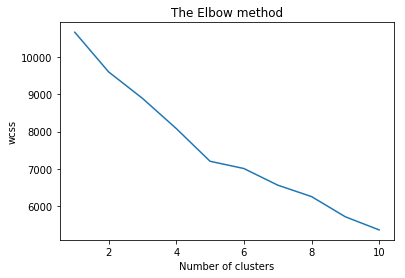

In [6]:
#Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')    
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
#colorscale = [[0,'#FAEE1C'],[0.33,'#F3558E'],[0.66,'#9C1DE7'],[1,'#581B98']]
#table = ff.create_table(data)
#py.plot(table)
from sklearn.decomposition import TruncatedSVD
#X = sparse_random_matrix(100, 100, density=0.01, random_state=42)
svd = TruncatedSVD(n_components=30, n_iter=7, random_state=42)
svd_x = svd.fit_transform(matrix)

In [12]:
svd_x.shape

(11596, 30)

No handles with labels found to put in legend.


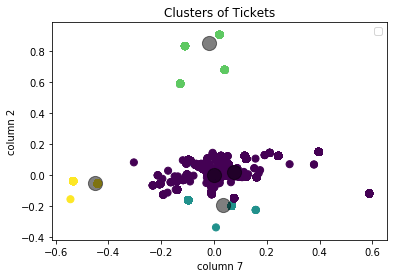

In [13]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(svd_x)
#kmeans.fit(matrix)
y_kmeans = kmeans.predict(svd_x)

centers = kmeans.cluster_centers_
plt.scatter(svd_x[:, 7], svd_x[:, 2], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 7], centers[:, 2], c='black', s=200, alpha=0.5);
plt.xlabel('column 7')
plt.ylabel('column 2')
plt.title('Clusters of Tickets')
#plt.xlabel('Tickets in vector representation')
plt.legend()
plt.show()

In [14]:
#kmeans.predict(svd_x).Value_counts
#pd.Series.value_counts(svd_x)
x = pd.Series(kmeans.predict(svd_x))
data['clusters'] = x
#Value_counts('clusters')
data.head()
data

,Number,Assignment group,Assignment To,State,Priority,Short description,Task type,Affected CI,Business Service,Closed,...,Unnamed: 15,Parent,Updated,Updated By,Acknowledged on [Service Order Task],Made SLA,Work Resoultion Notes,Unnamed: 22,Unnamed: 23,clusters
0,CTASK0000982,Application Admin,NaN,Closed Complete,4 - Low,Hire Report for IND,Change Task,ERP Systems,ERP Systems,18/02/16 14:40,...,NaN,CHG0000408,18/02/16 14:40,NaN,NaN,1,NaN,NaN,NaN,0
1,CTASK0000671,Application Admin,NaN,Closed Complete,4 - Low,Deploy the news bytes site to SP online,Change Task,nan,NaN,25/01/16 10:04,...,NaN,CHG0000302,25/01/16 10:04,NaN,NaN,1,NaN,NaN,NaN,0
2,CTASK0003241,Application Admin,NaN,Closed Complete,4 - Low,Switch the Database Services of Alpha Finance ...,Change Task,DBA,DBA,22/08/16 12:32,...,NaN,CHG0001076,22/08/16 12:32,NaN,NaN,1,NaN,NaN,NaN,0
3,CTASK0002485,Application Admin,NaN,Closed Complete,4 - Low,Stop the MobileFirst application services and ...,Change Task,Integration,IBM Mobility Platform,27/06/16 11:11,...,NaN,CHG0000868,27/06/16 11:11,NaN,NaN,1,NaN,NaN,NaN,0
4,CTASK0000596,Application Admin,NaN,Closed Complete,4 - Low,PIR Survey,Change Task,nan,NaN,18/02/16 14:46,...,NaN,CHG0000257,18/02/16 14:46,NaN,NaN,1,NaN,NaN,NaN,0
5,CTASK0001681,Application Admin,NaN,Closed Complete,4 - Low,Shutdown WAS integration server . . .,Change Task,Integration,Integration,23/04/16 16:13,...,NaN,CHG0000611,23/04/16 16:13,NaN,NaN,1,NaN,NaN,NaN,0
6,CTASK0003243,Application Admin,NaN,Closed Complete,4 - Low,Switch the Database Services of Alpha Finance ...,Change Task,DBA,DBA,22/08/16 12:32,...,NaN,CHG0001076,22/08/16 12:32,NaN,NaN,1,NaN,NaN,NaN,0
7,CTASK0001530,Application Admin,NaN,Closed Complete,4 - Low,To migrate PS Finance code to production,Change Task,ERP Systems,ERP Systems,7/4/2016 16:15,...,NaN,CHG0000561,7/4/2016 16:15,NaN,NaN,1,NaN,NaN,NaN,0
8,CTASK0001680,Application Admin,NaN,Closed Complete,4 - Low,Restart process servers none by node . . . and...,Change Task,Integration,Integration,23/04/16 16:13,...,NaN,CHG0000611,23/04/16 16:13,NaN,NaN,1,NaN,NaN,NaN,0
9,CTASK0002255,Application Admin,NaN,Closed Complete,4 - Low,PIR Survey,Change Task,IBM Mobility Platform,IBM Mobility Platform,9/6/2016 11:23,...,NaN,CHG0000779,9/6/2016 11:23,NaN,NaN,1,NaN,NaN,NaN,0


In [15]:
#Applying k-means to the dataset
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit(svd_x)  


In [16]:
from yellowbrick.text import TSNEVisualizer

In [17]:
y_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [11]:
tsne = TSNEVisualizer()
tsne.fit(svd_x, ["c{}".format(c) for c in y_kmeans.labels_])
tsne.poof()

ValueError: n_components must be < n_features; got 50 >= 30

In [19]:
my_dboard = dashboard.Dashboard()

box_a = {
    'type': 'box',
    'boxType': 'plot',
    'title': 'Dashboard'
}

box_b = {
    'type': 'box',
    'boxType': 'text',
    'text': 'text_for_box',
    'title': 'Markdown Options for Text Box'
}

box_c = {
    'type': 'box',
    'boxType': 'plot',
    'title': 'box-for-dashboard',
}
my_dboard.insert(box_c)
my_dboard.insert(box_a,'above',1, fill_percent = 12)
my_dboard.insert(box_b,'left',2, fill_percent = 30)
my_dboard['layout']['size'] = 3000

my_dboard['settings']['backgroundcolor'] = '#adcaea'
my_dboard['settings']['title'] = 'Ticketing System'
my_dboard['settings']['logoUrl'] = 'http://blog.alldogboots.com/wp-content/uploads/2014/07/I-get-you-and-I-care-super-customer-service-guy3.jpg'
my_dboard['settings']['foregroundColor']='#000000'

#url = py.dashboard_ops.upload(my_dboard,"Ticketing System",auto_open=True)
#print(url)
#my_dboard.get_preview()

import plotly.plotly as pl
pl.dashboard_ops.upload(my_dboard,"Tickets")

PlotlyRequestError: Authentication credentials were not provided.